In [20]:
import os
import math
import time
import tarfile
import shutil
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy import constants as cons
from astropy.table import Table, Column, vstack, join
import astropy.coordinates as coords
from astropy import units as u
from scipy import stats
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rc("font", family="Complex", size=14)
mpl.rc("axes", linewidth = 1)
mpl.rc("lines", linewidth = 1)
mpl.rc("xtick.major", pad = 8, size = 8, width = 1)
mpl.rc("ytick.major", pad = 8, size = 8, width = 1)
mpl.rc("xtick.minor", size = 4, width = 1)
mpl.rc("ytick.minor", size = 4, width = 1)
%matplotlib inline

In [21]:
#read the data 
hmscList = ascii.read('../Tables/hmscList_full_20161218.txt')
hiiList  = ascii.read('../Tables/hiiList_20161218.dat')
mmbList  = ascii.read('/Users/yuan/Desktop/MaserUTas/MMB/Tables/mmbGP_with_full_para.txt')
hiiList = hiiList[hiiList['Sp']>0.5]
mmbList = mmbList[mmbList['Sp_870']>0.5]
mmbList = mmbList[mmbList['L_M_ratio']<10000]
mmbList = mmbList[mmbList['L_clum'].mask == False]
hmscList = hmscList[hmscList['Lclump'].mask == False]
hmscList['L_M_ratio'].mask[hmscList['Mclump'].mask == True] = True

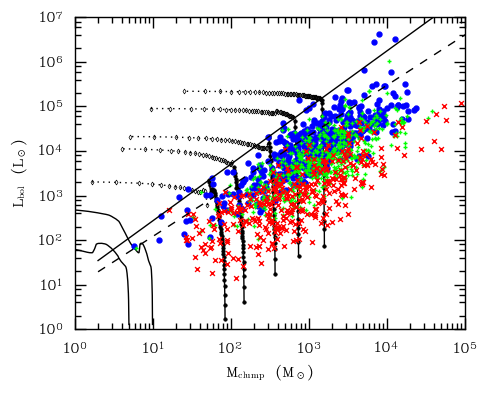

In [22]:
#%matplotlib inline
fig1 = plt.figure(1, figsize = (6.0,4.8))
fig1.subplots_adjust(left = 0.15, right = 0.8,
		bottom = 0.15, top = 0.8)
fig1.clf()
ax1 = fig1.add_subplot(111)
ax1.minorticks_on()

mlReDir = '../Tables/MLrelation/'
for idot in ['01','02','03','04']:
	data = ascii.read(mlReDir+'curve'+idot+'.dat')
	ax1.plot(data['Mass'], data['Lum'], 'k-', zorder = 0)

for idot in ['01','02','03','04','05']:
	data = ascii.read(mlReDir+'hori'+idot+'.dat')
	ax1.plot(data['Mass'], data['Lum'], marker = 'd',
		linestyle=':', color = 'black',
		markersize=2.5, zorder = 0, 
		markerfacecolor = 'None')

for idot in ['01','02','03','04','05']:
	data = ascii.read(mlReDir+'vert'+idot+'.dat')
	ax1.plot(data['Mass'], data['Lum'], marker = 'o',
		linestyle='-', color = 'black',
		markersize=2.5, zorder = 0)

a1,b1 = 1.27, 1.16
a2,b2 = 1.13, 0.95
x = np.logspace(np.log10(2),6,1000)
y1 = 10**(a1*np.log10(x))*10**b1
y2 = 10**(a2*np.log10(x))*10**b2
ax1.plot(x,y1,'k-')
ax1.plot(x,y2,'k--')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1, 1e7)
ax1.set_xlim(1,1e5)


ax1.scatter(hiiList['Mclump'],hiiList['Lclump'], marker = '.', s = 50, 
            color = 'blue')
ax1.scatter(mmbList['M_clum'],mmbList['L_clum'], marker = '+', s = 12, 
            color = 'lime')
ax1.scatter(hmscList['Mclump'],hmscList['Lclump'], marker = 'x', s = 12, 
            color = 'red')
ax1.set_ylabel('$L_\mathrm{bol}$ ($L_\odot$)')
ax1.set_xlabel('$M_\mathrm{clump}$ ($M_\odot$)')


fig1.savefig('../epsFigs/relationML.eps', papertype='a2',
				bbox_inches='tight')
fig1.savefig('../epsFigs/relationML.pdf', papertype='a2',
				bbox_inches='tight')

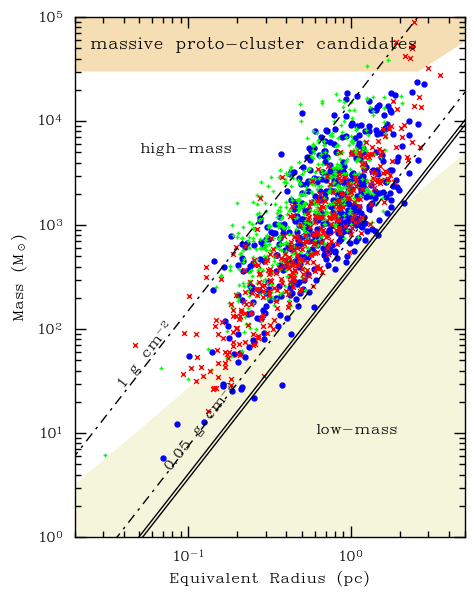

In [23]:
fig2 = plt.figure(1, figsize = (6,8))
fig2.subplots_adjust(left = 0.15, right = 0.8, wspace = 0.38,
        bottom = 0.15, top = 0.8)
fig2.clf()
ax1 = fig2.add_subplot(111)
ax1.minorticks_on()


ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.02,5)
ax1.set_ylim(1,1e5)

## create filled polygon for low-mass cores
x = np.logspace(np.log10(0.002), np.log10(30), 1000)
y = 580.0*x**1.33
yy = np.zeros(len(x))
#line, = ax1.plot(x,y,'k',zorder = 1, linewidth = 2)
#dashes = [10, 7, 3, 7]  # 10 points on, 5 off, 100 on, 5 off
#line.set_dashes(dashes)
ax1.fill_between(x,y,yy,facecolor = 'beige',linewidth=0.0)

ylada = 116*np.pi*x**2
yhei  = 129*np.pi*x**2
line, = ax1.plot(x,ylada,'k-',zorder = 1, linewidth = 1)
line, = ax1.plot(x,yhei,'k-',zorder = 1, linewidth = 1)

n1 = 1*u.g/(u.cm**2)

y_1g_cm2 = n1.to(u.M_sun/(u.pc**2)).value*np.pi*x**2
line, = ax1.plot(x,y_1g_cm2,'k-',zorder = 1, linewidth = 1)
dashes = [7, 4, 2, 4]  # 10 points on, 5 off, 100 on, 5 off
line.set_dashes(dashes)
n2 = 0.05*u.g/(u.cm**2)

y_0_05g_cm2 = n2.to(u.M_sun/(u.pc**2)).value*np.pi*x**2
line, = ax1.plot(x,y_0_05g_cm2,'k-',zorder = 1, linewidth = 1)
dashes = [7, 4, 2, 4]  # 10 points on, 5 off, 100 on, 5 off
line.set_dashes(dashes)


#ax1.fill_between(x,ylada,yhei,facecolor = 'silver',linewidth=0.0)
## create filled polygon for massive clusters defined in Bressert et al. (2012)

x1 = np.logspace(np.log10(0.002), np.log10(2.6), 100)
y1 = np.ones(len(x1))*3e4

x2 = np.logspace(np.log10(2.6), np.log10(7.16775), 100)
y2 = np.logspace(np.log10(3e4), np.log10(8.31592e4), 100)

x3 = np.logspace(np.log10(7.16775), np.log10(23.8), 100)
y3 = np.logspace(np.log10(8.31592e4), np.log10(3e6), 100)

xall = np.concatenate((x1,x2,x3))
yall = np.concatenate((y1,y2,y3))
yyall = np.ones(len(xall))*1e6

ax1.fill_between(xall,yall,yyall,facecolor = 'wheat',linewidth=0.0)

ax1.scatter(hiiList['r_pc'],hiiList['Mclump'], marker = '.', s = 50, 
            color = 'blue')
ax1.scatter(mmbList['r_pc'],mmbList['M_clum'], marker = '+', s = 12, 
            color = 'lime')
ax1.scatter(hmscList['r_pc'],hmscList['Mclump'], marker = 'x', s = 12, 
            color = 'red')
#tem_cb.set_label(r"$T_\mathrm{dust}$ (K)", rotation = -90, labelpad = 15)

#axc.minorticks_on()

ax1.set_xlabel(r'Equivalent Radius (pc)')
ax1.set_ylabel('Mass ($M_\odot$)')

ax1.text(0.035, 100, '1 g cm$^{-2}$', rotation = 52)
ax1.text(0.068, 25, '0.05 g cm$^{-2}$', rotation = 52)
ax1.text(0.05, 5e3, 'high-mass')
ax1.text(0.6, 10, 'low-mass')
ax1.text(0.025, 5e4, 'massive proto-cluster candidates', size = 11)
fig2.savefig('../epsFigs/relationMR.eps', papertype='a2',
                bbox_inches='tight')
fig2.savefig('../epsFigs/relationMR.pdf', papertype='a2',
                bbox_inches='tight')